# Actividad 3 - Implementación y agregación de segmentadores

### Integrantes Equipo 7

* Eduardo Reyero Ibáñez

* Salvador Florido Llorens

* Jerónimo Cabezuelo Ruiz

* Albert Marquillas Estruch

### Asistencia a las reuniones de los integrantes del grupo

<table class="default">
    <thead>
    <tr>
        <th style="text-align:center;color:#0000FF">Alumnos</th>
        <th style="text-align:center;color:#0000FF">Asistencia a Reuniones</th>
        <th style="text-align:center;color:#0000FF">Trabajo aportado</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="text-align:left"> Albert Marquillas Estruch </td>
        <td style="text-align:center"> 3/3 </td>
        <td style="text-align:center"> 3/3 </td>
    </tr>
    <tr>
        <td style="text-align:left"> Eduardo Reyero Ibáñez </td>
        <td style="text-align:center"> 3/3 </td>
        <td style="text-align:center"> 3/3 </td>
    </tr>
    <tr>
        <td style="text-align:left"> Jerónimo Cabezuelo Ruiz </td>
        <td style="text-align:center"> 3/3 </td>
        <td style="text-align:center"> 3/3 </td>
    </tr>
    <tr>
        <td style="text-align:left"> Salvador Florido LLorens </td>
        <td style="text-align:center"> 3/3 </td>
        <td style="text-align:center"> 3/3 </td>
    </tr>
    </tbody>
</table>

### Imports para el programa

In [2]:
# Se realizan los imports necesarios para poder realizar el proceso
import numpy as np
import cv2
import skimage
from skimage.segmentation import slic, mark_boundaries, felzenszwalb
from skimage.util import img_as_float
from skimage import io
from medpy.graphcut import graph_from_voxels
from medpy.graphcut.energy_voxel import boundary_difference_exponential
# Se importa una serie de funciones necesarias para la elaboración de la actividad
from functions import * 

# 1. Descripción

Esta actividad trata sobre comparar distintos segmentadores aplicados al mismo problema. Para ello se aplicaran cuatro segmentadores para obtener la matricula de dos vehiculos.

# 2. Imágenes de ejemplo

Para esta actividad se utilizarán dos imagenes de ejemplo. Concretamente se usaran imagenes de dos coches diferentes, uno visto desde la parte delantera y otro desde la trasera.

A continuación se cargan y se muestran las imagenes que se usaran.

In [3]:
coche1 = io.imread('coche1.jpg')
coche2 = io.imread('coche2.jpg')

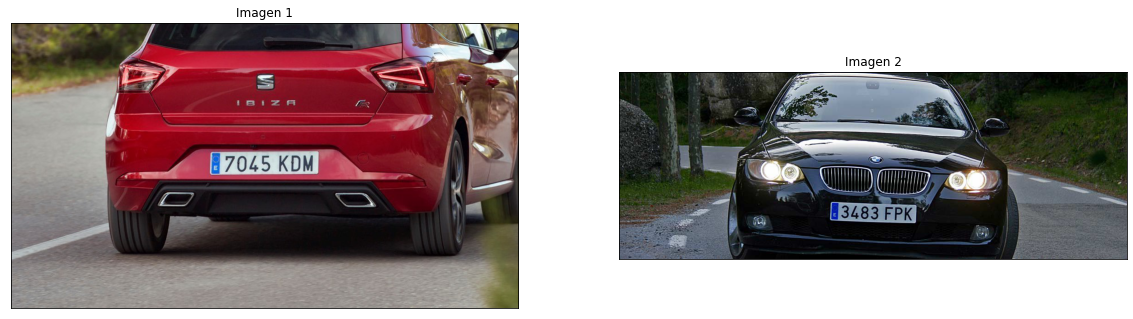

In [4]:
imshow_compare(coche1,coche2)

# 3. Segmentación

Se van a usar un total de cuatro segmentadores para recuperar las matrículas. Estos segmentadores se han elegido en base a ciertas utilidades que puede aportar cada uno según la manera en como enfocan su segmentación.  

## SLIC

La segmentación SLIC o Simple Linear Iterative Clustering es un algoritmo para la generación de superíxeles. Estos superpíxeles o clústers son generados según el color y la proximidad de las distintas partes de la imagen. En este caso, el objeto de interés es la matrícula de un coche, por tanto nos interesa segmentar una zona uniforme y cercana de la imagen. Esto hace que este segmentador sea uno apropiado para esta tarea.

La aplicación del segmentador SLIC en las imagenes de ejemplo se encuentra a continuación.

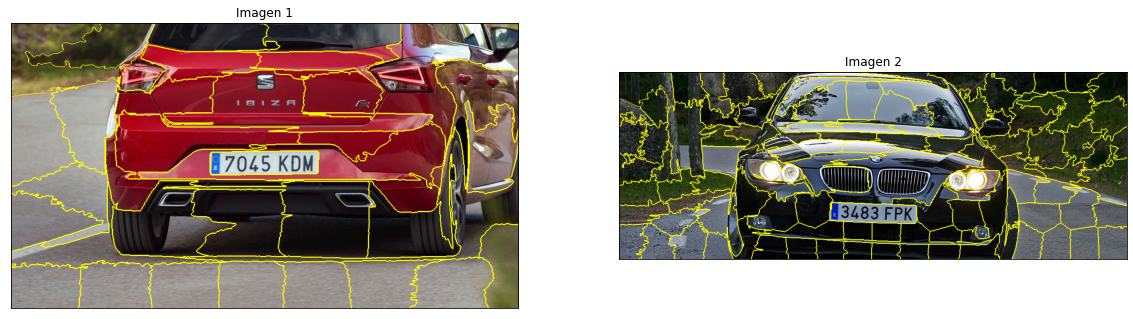

In [5]:
# Se transforman los píxeles de la imagen a float
coche1_float = img_as_float(coche1[::1, ::1])
coche2_float = img_as_float(coche2[::1, ::1])

# Se obtienen los segmentos de la imagen usando el metodo slic
coche1_segmentos = slic(coche1_float, n_segments=50, compactness=10, sigma=1)
coche2_segmentos = slic(coche2_float, n_segments=120, compactness=10, sigma=1)

# Se obtienen los bordes de los segmentos sobre la imagen original
coche1_bordes = mark_boundaries(coche1_float, coche1_segmentos)
coche2_bordes = mark_boundaries(coche2_float, coche2_segmentos)

# Se muestra el resultado de la segmentación
imshow_compare(coche1_bordes,coche2_bordes)

Se puede ver como en ambas imagenes uno de los segmentos encontrado ha sido la matrícula. Cabe mencionar que se han tenido que modificar los parametros de número de segmentos para que no se cortase la matrícula en dos segmentos. Por tanto, al reducir el número de segmentos, los segmentos son más grandes.

Por último, se muestra la parte de la matrícula segmentada para ambos casos. Cabe mencionar que como este segmentador produce segmentos que pueden tener características de altura y anchura parecidas a la matrícula. Por tanto, será necesaria una revisión manual de cual es el segmento de la matrícula dentro de los posibles encontrados por la función. La función usada sirve para buscar segmentos de unas medidas determinadas, las cuales se han establecido en base a las medidas de las matrículas. A partir de una imagen segmentada devuelve los labels de los segmentos que cumplen con ese critério.

In [6]:
detect_plate_label(coche1_segmentos)

[6, 16, 20, 28]

En este caso hay cuatro posibles segmentos, revisando la imagen se ha podido comprobar que el segmento correspondiente a la matrícula es el 20.

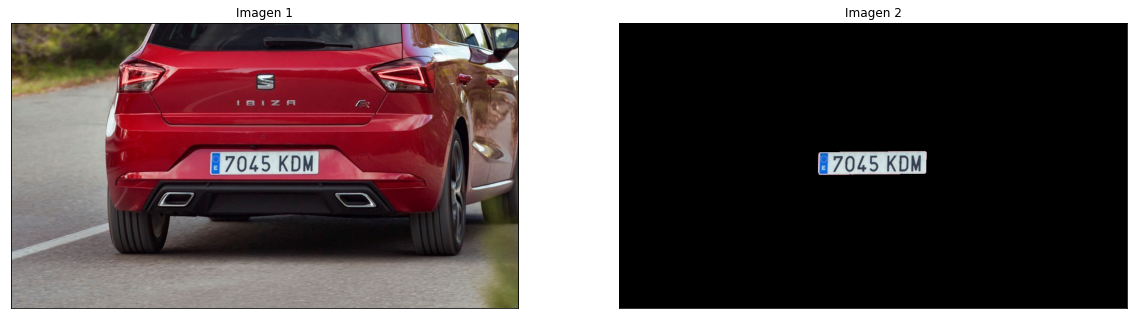

In [7]:
matricula1_segmentada = isolate_plate(20,coche1_segmentos,coche1)
imshow_compare(coche1,matricula1_segmentada)

Se realiza el mismo proceso para la segunda imagen.

In [8]:
detect_plate_label(coche2_segmentos)

[0, 4, 14, 46, 47, 69, 73]

El segmento que en este caso se corresponde a la matrícula es el 73.

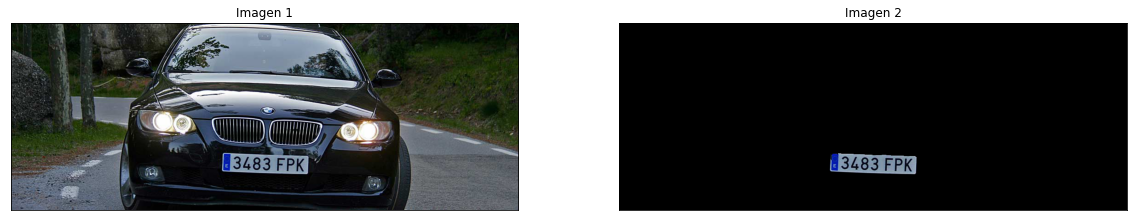

In [9]:
matricula2_segmentada = isolate_plate(73,coche2_segmentos,coche2)
imshow_compare(coche2,matricula2_segmentada)

Se puede ver como en ambas imagenes se obtiene una segmentación de la matrícula bastante buena. A simple vista, la primera imagen se ven mejores resultados, lo cual se puede deber a que en la segunda, la matrícula es una parte más pequeña de la imagen y al segmentador le cuesta más obtener los bordes perfectamente, lo cual se refleja en la esquina superior izquierda.

### Comparar con ground truth

Se importan los ground truth generados para cada imagen y utilizando la función de comparación se obtienen las metricas interesantes para determinar lo buena que es la segmentación. En este caso, como la matrícula es pequeña será de gran interés la métrica F1, aunque también se muestran la precision y el recall.

Se empieza por las métricas de la primera imagen de ejemplo.

In [10]:
coche1_gt = io.imread('coche1_gt.jpg', as_gray=True)

comparation(matricula1_segmentada,coche1_gt)

Precision:  0.9545752061788192
Recall:  0.9942732478865558
F1:  0.9740199024911508


Se puede observar que las metricas arrojan buenos resultados. En el caso de el F1 score se obtiene un valor muy cercano a 1, que es el máximo, por lo que se puede afirmar que el segmentador SLIC es bueno para segmentar esta imagen.

A continuación se aplica a la segunda imagen:

In [11]:
coche2_gt = io.imread('coche2_gt.jpg', as_gray=True)

comparation(matricula2_segmentada,coche2_gt)

Precision:  0.9268613522757169
Recall:  0.989884799100871
F1:  0.9573369565217391


En este segundo caso, la metrica F1 también es muy buena, aunque es un poco peor que en el primer caso, pero sigue siendo muy cercana a 1.

Una cosa a destacar es el buen valor de recall que se obtiene en ambas imagenes, que es practicamente 1 y eso significa que el segmentador SLIC es capaz de identificar un gran porcentaje de los píxeles pertenecientes a la matrícula. Juntando este gran valor de recall con una también alta precisión, que indica cuan de buenas son las predicciones de cada píxel, se obtiene un segmentador muy bueno para este caso.

## Graph cut

Lo primero que vamos a hacer es importar las imagenes. Tambien tendremos que derle unas marcas que nos ayudaran a separa la matricula del resto. Lo ideal sería que estas las marcara el usuario, en este caso lo tenemos en unas imagenes que tambien vamos a importar.

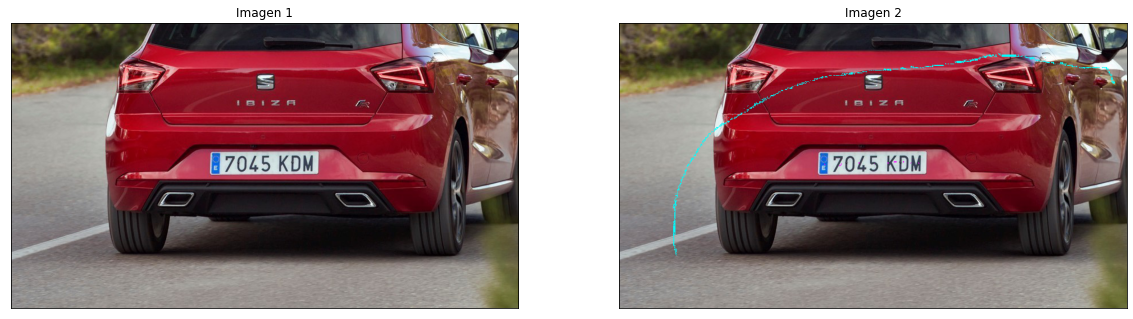

In [12]:
coche1Back, coche1Fore = imreadBinary("coche1input.jpg")

coche1Marcado = marcasBackgroundForeground(coche1,coche1Fore,coche1Back)
imshow_compare(coche1, coche1Marcado);

El paquete de medpy representa las imagenes con los canales de colores por separado, es decir una imagen cargada con medpy tiene un *shape* de *(3,ancho,alto)* mientras que una imagen cargada con skimage tendrá un *shape* de *(alto,ancho,3)*. Para pasar de una a otra se han definido las funciones medpy_a_skimage y skimage_a_medpy, las cuales se encuentran en el fichero functions.py.

Pasamos las tres imagenes, la del coche, la marca de *foreground* y la marca de *background*, a imagenes de medpy.

In [13]:
coche_medpy = skimage_a_medpy(coche1)
cocheFore_medpy = coche1Fore.transpose()*255
cocheBack_medpy = coche1Back.transpose()*255

Vamos a crear el grafo con la función graph_from_voxel del paquete medpy. Esta necesita un par de parametros.

In [14]:
sigma = 10.
spacing = (1.0,1.0,1.0)

Creamos el grafo, usamos la funcion boundary_difference_exponential para calcular los pesos de los bordes.

In [15]:
grafo = graph_from_voxels(np.array([cocheFore_medpy,cocheFore_medpy,cocheFore_medpy]), # Marcas de foreground
                          np.array([cocheBack_medpy,cocheBack_medpy,cocheBack_medpy]), # Marcas de backgorund
                          boundary_term = boundary_difference_exponential,  #Calculo pesos bordes
                          boundary_term_args = (coche_medpy, sigma, spacing));

/usr/local/lib/python3.6/dist-packages/medpy/graphcut/energy_voxel.py:623: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  neighbourhood_intensity_term = neighbourhood_function(image[slices_exclude_last], image[slices_exclude_first])


Una vez que tenemos el grafo tenemos que cortarlo por los arcos minimos. Este problema es equivalente al de maximo flujo, por tanto usaremos el metodo maxflow del paquete medpy.

In [16]:
grafo.maxflow();

Por ultimo tenemos que reconstruir la imagen a partir del grafo. La imagen tendrá 0 o 255.

In [17]:
resultado_medpy = np.zeros(coche_medpy.size, dtype=np.bool)
for idx in range(len(resultado_medpy)):
    if grafo.termtype.SINK == grafo.what_segment(idx):
        resultado_medpy[idx] = False 
    else:
        resultado_medpy[idx] = True   
resultado_medpy = resultado_medpy.reshape(coche_medpy.shape)

Esta imagen vamos a trasladarla a las que podemos representar con skimage.

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


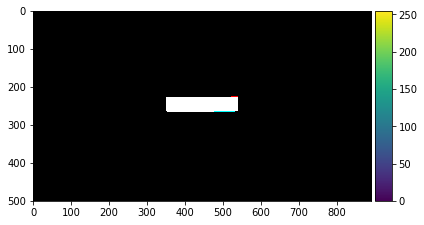

In [18]:
resultado = medpy_a_skimage(resultado_medpy)
io.imshow(resultado*255);

En realidad esta mascara tiene un valor por cada uno de los canales es decir que para cada pixel nos da tres valores booleanos, uno para cada canal de color. Vamos a contruir una mascara con un valor booleano para cada pixel, esto lo haremos de la siguente manera para cada pixel haremos una votacion con los tres booleanos.

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


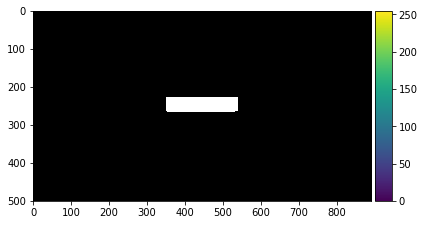

In [19]:
mask1 = np.zeros([resultado.shape[0],resultado.shape[1]],dtype=bool)
mask1[np.count_nonzero(resultado == True, axis=2)>1.5] = True 
resultado=medpy_a_skimage(np.array([mask1.transpose(),mask1.transpose(),mask1.transpose()]))
io.imshow(resultado*255);

Vamos a ver esto que parte es en la imagen original.

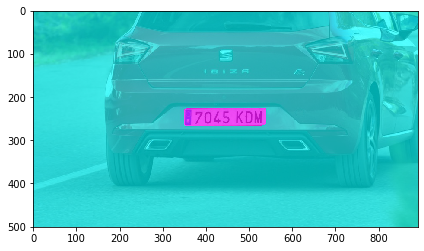

In [20]:
resultado1 = resultadoMarcado(coche1,resultado*255)
io.imshow(resultado1);

A continuación se realizará el mismo proceso a la segunda imagen. Para compactar se han incluido los pasos previos en una sola función.

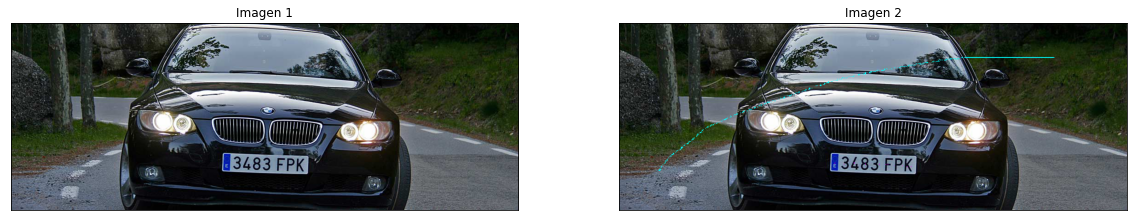

In [21]:
coche2 = io.imread("coche2.jpg")
coche2Back, coche2Fore = imreadBinary("coche2input.jpg")
cocheMarcado = marcasBackgroundForeground(coche2,coche2Fore,coche2Back)
imshow_compare(coche2, cocheMarcado);

Pasamos las imagenes a medpy
Creamos el grafo


/usr/local/lib/python3.6/dist-packages/medpy/graphcut/energy_voxel.py:623: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  neighbourhood_intensity_term = neighbourhood_function(image[slices_exclude_last], image[slices_exclude_first])


Calculamos el maxflow
Calculmaos el resultado


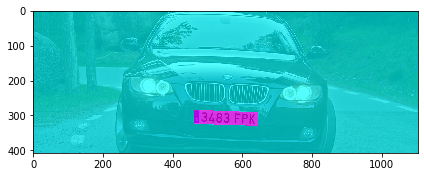

In [22]:
mask2,resultado2  = segmentacionGraphCut(coche2,coche2Fore,coche2Back)

### Comparativa con ground truth

Se comparan las métricas de error.

In [23]:
comparation(mask1,coche1_gt)

Precision:  0.9697773064687168
Recall:  0.9975456776656667
F1:  0.9834655195590805


In [24]:
comparation(mask2,coche2_gt)

Precision:  0.958080603854967
Recall:  0.9985951109862321
F1:  0.9779184150787645


Se puede ver como ambas segmentaciones dan un muy buen valor de F1 que es prácticamente igual a 1, por lo tanto, el segmentador graph cut es una muy buena opción para este caso.

## Felzenszwalb

El segmentador Felzenswalb es un tipo de segmentador basado en grafos que utiliza una metodología basada en *Minimum Spanning Tree* (MSP). Entre sus principales características se puede destacar que es bottom-up, utiliza clustering adaptativo y su eficiencia, permitiendo su uso para aplicaciones en tiempo real.

A continuación se aplicará el segmentador para obtener las matriculas de los vehiculos utilizados previamente con los otros segmentadores. En primer lugar se realiza una conversión de la imagen a escala de grises:

In [25]:
# Pasamos a escala de grises
coche1_gray = cv2.cvtColor(coche1, cv2.COLOR_BGR2GRAY)
coche2_gray = cv2.cvtColor(coche2, cv2.COLOR_BGR2GRAY)

En segundo lugar se aplica el segmentador, el cual se encuentra implementado en la libreria skimage. Entre los parámetros de la función se destaca scale, el cual permite regular el tamaño de las regiones a segmentar. Se ha elegido un valor lo suficientememente grande como para que segmente la matricula y evite elementos más pequeños de la imagen.

In [26]:
# Segmentation 
coche1_segments_fz = felzenszwalb(coche1_gray, scale = 3000, sigma = 0.5, min_size = 500) 
coche2_segments_fz = felzenszwalb(coche2_gray, scale = 3000, sigma = 0.5, min_size = 500)

Una vez aplicado el segmentador se va a mostrar las regiones separadas por el algoritmo junto a la imagen original. Como puede verse a primera vista, en ambos casos se ha conseguido segmentar la región de la matricula.

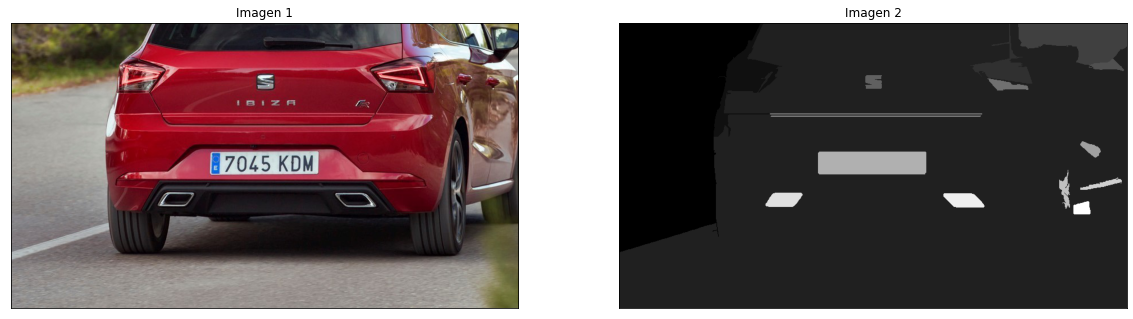

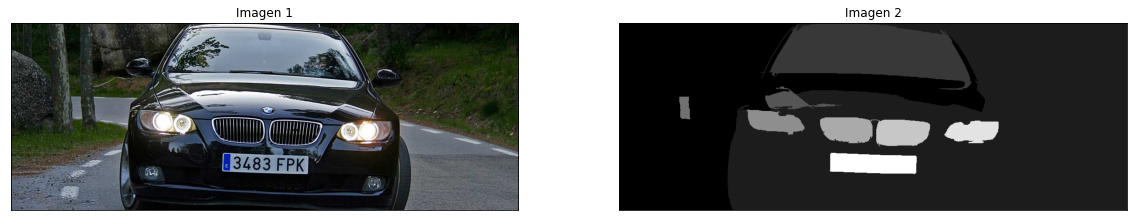

In [27]:
# Segmentos coche 1
imshow_compare(coche1,coche1_segments_fz)

# Segmentos coche2
imshow_compare(coche2,coche2_segments_fz)

El siguiente paso es, dentro de las regiones segmentadas, identificar cual de ellas es la matricula. Para ello se analizan las diferentes regiones en función de su tamaño y se obtiene la región que más se adecua a una matricula. Para realizar este paso se utiliza la función detect_plate_label, la cual se ha implementado en el fichero functions.py. Posteriormente, utilizando la función isolate_plate, también implementada en el fichero functions.py, se aisla la región de la matricula en la imagen para su posterior impresión.  
En las imagenes siguientes puede verse junto a la imagen del coche otra imagen con la matricula segmentada.

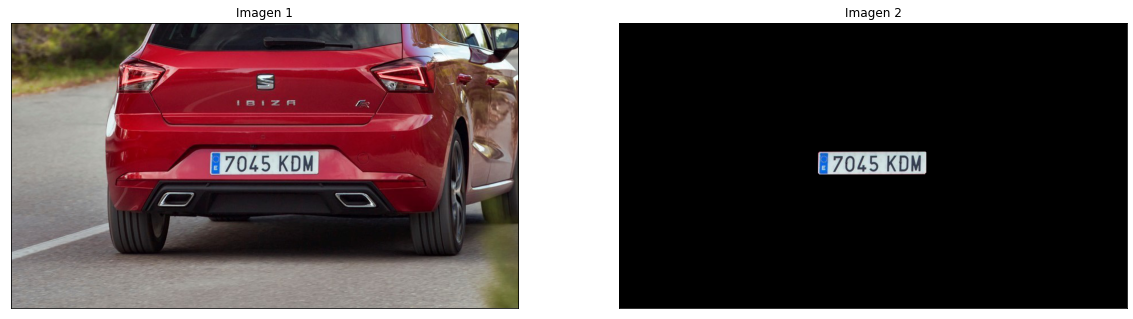

In [28]:
# Aislamos matricula coche 1
segmented_plate1 = isolate_plate(detect_plate_label(coche1_segments_fz)[0],coche1_segments_fz,coche1)
imshow_compare(coche1,segmented_plate1)

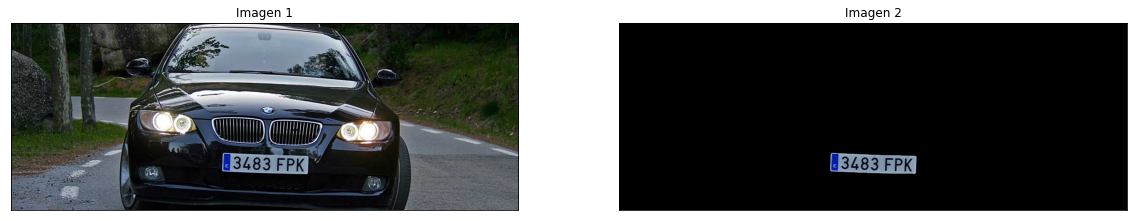

In [29]:
# Aislamos matricula coche 2
segmented_plate2 = isolate_plate(detect_plate_label(coche2_segments_fz)[0],coche2_segments_fz,coche2)
imshow_compare(coche2,segmented_plate2)

### Comparar con ground truth

Al igual que en los casos anteriores se va a aplicar las métricas de Precision, Recall y F1 para comparar la región segmentada con el ground truth creado para la imagen.

En el caso del primer coche puede verse como se obtienen muy buenos resultados, destacando un valor de F1 de 0.982:

In [30]:
comparation(segmented_plate1,coche1_gt)

Precision:  0.9659989457037428
Recall:  0.9994545950368149
F1:  0.9824420318992092


En el caso del segundo coche, las metricas obtenidas son ligeramente inferiores, pero con muy buenos resultados aun así:

In [31]:
comparation(segmented_plate2,coche2_gt)

Precision:  0.9490258873765679
Recall:  0.9991570665917393
F1:  0.9734464823432796


## Active contours

El algoritmo básico de contornos activos consiste en las denomindas snakes que son lineas flexibles en un espacio de dos dimensiones, las cuales se mueven alrededor de la imagen con el objetivo de minimizar su funcional de energía.
En esta implementación se emplean las ecuaciones obtenidas por el método iterativo de kass:

<img src="ecuaciones_snake.jpeg">

La función iterate_snake, implementada en el fichero functions.py, por un lado inicializa la primera snake (primera elipse) mediante sus coordenadas en la imagen x e y. El parámetro alfa controla la longitud del snake, valores más altos provocan contracciones mayores en el mismo a lo largo de las iteraciones. Por otro lado, el parámetro beta hace que el snake se haga más suave y menos flexible (más rígido). Otro parámetro es gamma corresponde con el ancho del paso en cada iteración. Valores alto de este argumento hace que el algoritmo converja más rapido, es decir, en menor iteraciones. 

Luego, tenemos fx y fy, los cuales corresponden a los gradientes de la imagen original en las dos direcciones del plano (x, y). Estos gradientes modelan las fuerzas de "atracción" del snake que lo atraen distintos contornos y bordes de la imagen. 

Antes de la implementación del bucle que itera sobre las dos ecuaciones antes mostradas, se debe calcular la matriz:

<img src="ecuaciones_snake_inversaMatrix.jpeg">

Y luego invertirla. En este proceso interviene función "create_A()" y se ejecuta y guarda en la variable "B". 

Una vez implementado el algoritmo se inicializan los parámetros del mismo tanto como para la imagen del coche1 como la del coche 2. Y se calculan sus ambos gradientes fx, fy.

Para la imagen 1:

In [32]:
img1 = skimage.color.rgb2gray(coche1)
t1 = np.arange(0, 2*np.pi, 0.1)
x1 = 450+230*np.cos(t1)
y1 = 245+60*np.sin(t1)
alpha1 = 0.8
beta1 = 10
gamma1 = 1
iterations1 = 100

fx1, fy1 = create_external_edge_force_gradients_from_img( img1 )

Para la imagen 2:

In [33]:
img2 = skimage.color.rgb2gray(coche2)
t2 = np.arange(0, 2*np.pi, 0.1)
x2 = 550+200*np.cos(t2)
y2 = 307+60*np.sin(t2)
alpha2 = 0.8
beta2 = 10
gamma2 = 1
iterations2 = 100

fx2, fy2 = create_external_edge_force_gradients_from_img( img2 )

A continuación, se procede con la aplicación de los contornos activos para las dos imagenes.

Para la imagen 1:

In [34]:
snakes1 = iterate_snake(
    x = x1,
    y = y1,
    a = alpha1,
    b = beta1,
    fx = fx1,
    fy = fy1,
    gamma = gamma1,
    n_iters = iterations1,
    return_all = True
)

Para la imagen 2:

In [35]:
snakes2 = iterate_snake(
    x = x2,
    y = y2,
    a = alpha2,
    b = beta2,
    fx = fx2,
    fy = fy2,
    gamma = gamma2,
    n_iters = iterations2,
    return_all = True
)

A continuación se utiliza la función plot_snakes, implementada en el fichero functions.py. Esta función muestra los resultados de los snakes inicial y calculados en azul, mientras que el final y definitivo snake está en rojo. Al aplicarlo a los ejemplos obtenemos:

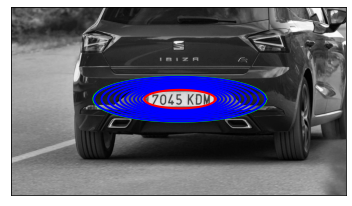

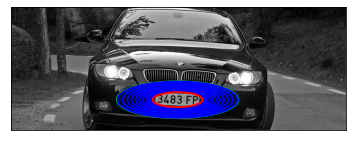

In [36]:
plot_snakes(img1, x1, y1, snakes1)
plot_snakes(img2, x2, y2, snakes2)

El siguiente paso es la obtención de la máscara binaria a partir del último snake calculado. Luego se muestra la multiplicación de dicha mascara con la imagen original para que se aprecie mejor la segmentación. Como vemos desde un punto de vista cualitativo, esta técnica es muy suceptible de la inicialización de sus contorno. Al ser en este caso una elipsoide no ha conseguido ajustarse a las esquinas recatangulares de la matrícula, pero al menos se ha parado en el punto necesario para segmentar la información de la misma.  
Para obtener la mascara se utiliza la función get_mask, implementada en el fichero functions.py.  
Al aplicarlo a las dos imagenes de ejemplo se obtiene:

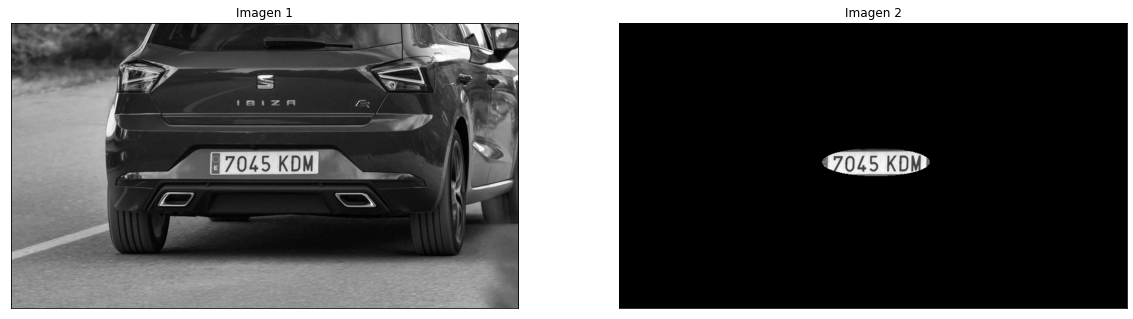

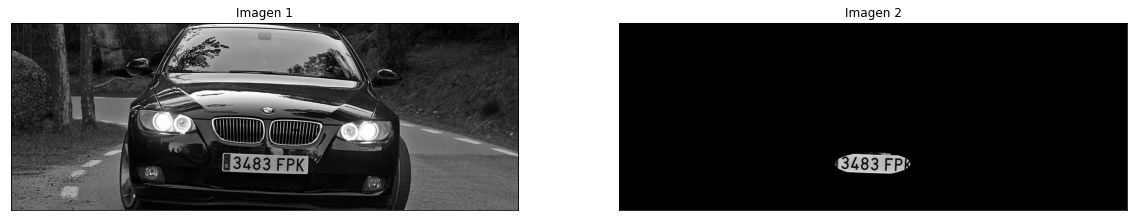

In [37]:
binary_mask1 = get_mask(img1, x1, y2, snakes1)
segmented_image1 = binary_mask1*img1
binary_mask2 = get_mask(img2, x2, y2, snakes2)
segmented_image2 = binary_mask2*img2
imshow_compare(img1,segmented_image1)
imshow_compare(img2,segmented_image2)

## Comparación con ground truth

Ahora se procede a compararla con la mascara verdadera y se computan las métricas de evaluación de precisión, recall y F1.

In [38]:
comparation(binary_mask1, coche1_gt)

Precision:  0.8749828837464055
Recall:  0.871284428688301
F1:  0.8731297397007582


In [39]:
comparation(binary_mask2, coche2_gt)

Precision:  0.8772289727000158
Recall:  0.7809778027535824
F1:  0.8263099219620959


Son resultados satisfactorios pero no tan buenos como los de sus competidores. Además, se aprecia una mejor segmentacion en la imagen del coche 1 que en la 2, seguramente provocada por un mayor contraste original de dicha matrícula respecto a la del coche 2.

## Agregación de segmentadores

Primero de todo se normalizan todos los resultados de los cuatro segmentadores para poder agregarlos facilmente.

In [40]:
# Noramlizar imagenes a 0 y 1

slic_norm1 = foreground_white(matricula1_segmentada)
slic_norm1 = (slic_norm1/np.amax(slic_norm1).astype(int))
slic_norm2 = foreground_white(matricula2_segmentada)
slic_norm2 = (slic_norm2/np.amax(slic_norm2).astype(int))

fz_norm1 = foreground_white(segmented_plate1)
fz_norm1 = (fz_norm1/np.amax(fz_norm1).astype(int))
fz_norm2 = foreground_white(segmented_plate2)
fz_norm2 = (fz_norm2/np.amax(fz_norm2).astype(int))

gc_norm1 = mask1
gc_norm2 = mask2

ac_norm1 = binary_mask1
ac_norm2 = binary_mask2

Se agregan los resultados de los segmentadores.

In [41]:
voted_img1 = slic_norm1 + fz_norm1 + gc_norm1 + ac_norm1
voted_img2 = slic_norm2 + fz_norm2 + gc_norm2 + ac_norm2

Se muestra el mapa de calor de ambas imagenes resultates de la agregaicón.

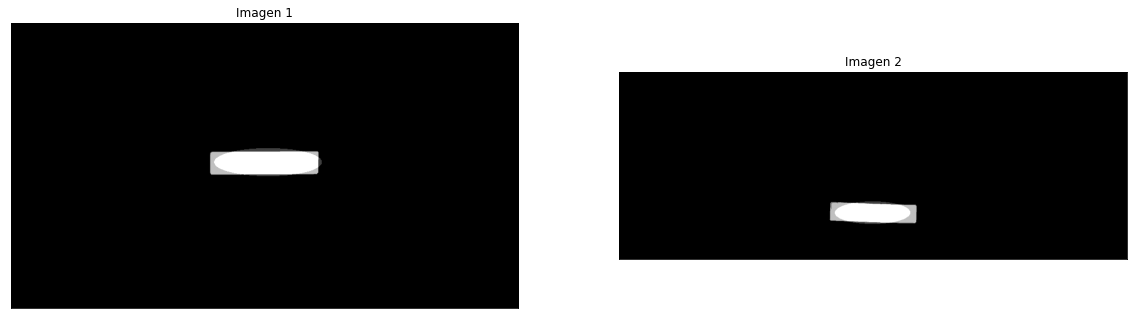

In [42]:
imshow_compare(voted_img1,voted_img2)

Se utilizarán los puntos en los que tres o más de los segmentadores hayan marcado como píxel correspondiente a la matricula.

In [43]:
voted_img1 = (voted_img1/3).astype(int)
voted_img2 = (voted_img2/3).astype(int)

A continuación se muestran las métricas de error de la agregación de los cuatro segmentadores para las dos imagenes:

In [44]:
comparation(voted_img1, coche1_gt)

Precision:  0.9737862779189514
Recall:  0.9927733842377966
F1:  0.9831881709540207


In [45]:
comparation(voted_img2, coche2_gt)

Precision:  0.9650225440633966
Recall:  0.9922731104242765
F1:  0.9784581284200319


Como se puede observar, el resultado de la agregación de segmentadores es positivo ya que se obtienen unas métricas muy buenas casi llegando a la perfección igualando el ground truth.

# 4. Conclusiones

Esta actividad ha sido útil para mostrar como distintos segmentadores trabajan para intentar alcanzar el mismo objetivo, que en este caso ha sido el de segmentar la matrícula de un coche, que es una aplicación bastante usada en la realidad.

Cada segmentador tiene distintas formas de realizar la segmentación, pero los cuatro han obtenido resultados muy similares. El que más se ha diferenciado ha sido la segmentación de active contours, obteniendo unos resultados un poco peores. 

En una caso real, se escogería la agregación de los cuatro para implementar el segmentador o bien se usaría el de Felzenszwalb, que es el que mejores métricas ha dado y menor interacción por parte del programador necesita para obtener la matrícula.

# 5. Referencias

[1] Dey, S. (2018). *Interactive Image Segmentation with Graph-Cut in Python. sandipanweb.* https://sandipanweb.wordpress.com/2018/02/11/interactive-image-segmentation-with-graph-cut/

[2] Maier, O. (2013). *Graph-cut (max-flow/min-cut) (medpy.graphcut) — MedPy 0.4.0 documentation.* https://loli.github.io/medpy/graphcut.html

[3] Cris Luengo (2009). A simple implementation of snakes. Cris´Image Analysis Blog
https://www.crisluengo.net/archives/217/

[4] Scikit-image(2021).*Comparison of segmentation and superpixel algorithms*
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html